## K-means algorithm

The following is a simplified version of the k-means algorithm.

```
1. Initialize k centroids randomly: C = {c_1, c_2, ..., c_k}
2. Repeat until convergence:
    a. Assign each data point x_i to the closest centroid:
       for i = 1 to m:
           d = distance(x_i, c_j) for all j
           assign x_i to cluster with closest c_j

    b. Compute new centroids for the clusters:
       for j = 1 to k:
           c_j = mean of all points assigned to cluster j

3. Return centroids C and cluster assignments for each data point
```

Where:
- $ k $ is the number of clusters.
- $ m $ is the number of data points.
- $ x_i $ represents each data point.
- $ c_j $ represents each centroid.
- The `distance` function could be the Euclidean distance or any other distance metric suitable for the dataset.

One way to determine convergence is when the assignments of data points to clusters no longer change.  In practice, several strategies might be used:

1. **Change in Centroids**: Stop the algorithm when the change in centroid positions is below a small threshold. This means the centroids are barely moving.
2. **Maximum Iterations**: Sometimes, to prevent endless loops due to anomalies or certain data structures, a maximum number of iterations is set. Even if the algorithm hasn't fully converged by this point, it will stop.
3. **Change in Cost Function**: $ k $-means tries to minimize the within-cluster sum of squares. If the decrease in this cost function between iterations is smaller than a predefined threshold, the algorithm can be stopped.
4. **No Change in Assignments**: As mentioned, if no data point changes its cluster assignment between two consecutive iterations, the algorithm has converged.

In many implementations, a combination of the above criteria might be used to ensure both efficiency and convergence.

## The Importance of Initial Centers

Choosing initial centroids can have a large impact on the performance of k-means clustering.  Consider the following examples:

### A good clustering result

| ![image1](assets/Slide36_Image1.png) | ![image2](assets/Slide36_Image2.png) | ![image3](assets/Slide36_Image3.png) |
|---|---|---|
| ![image4](assets/Slide36_Image4.png) | ![image5](assets/Slide36_Image5.png) | ![image6](assets/Slide36_Image6.png) |

### A not so good clustering result

| ![image1](assets/Slide38_Image1.png) | ![image2](assets/Slide38_Image2.png) | ![image3](assets/Slide38_Image3.png) |
|---|---|---|
| ![image4](assets/Slide38_Image4.png) | ![image5](assets/Slide38_Image5.png) | 

## Possible Solutions to the Initial Centroids Problem

As illustrated above, selecting initial centroids in $ k $-means clustering is crucial because a poor choice can lead to suboptimal clusterings. Here are some common strategies to address the challenge of choosing initial centroids:

1. **Random Initialization**: 
   - Randomly choose $ k $ data points from the dataset as the initial centroids. 
   - While simple, this method can sometimes result in poor convergence or convergence to a local minimum.
2. **Forgy Method**:
   - Similar to random initialization, but instead of picking data points as centroids, $ k $ distinct instances are chosen at random from the dataset.
3. **K-Means++**:
   - This method aims to spread out the initial centroids.
   - First, one centroid is chosen uniformly at random from the data points.
   - The next centroid is selected from the remaining data points with probability proportional to the square of the distance from the point to the nearest existing centroid.
   - Repeat until $ k $ centroids are chosen.
   - K-Means++ tends to lead to better and more consistent results compared to random initialization.
4. **Spread Out Initialization**:
   - Divide the data space into a grid of small, equally-sized cells.
   - Select $ k $ cells randomly and use their center points as initial centroids.
5. **Use Hierarchical Clustering**:
   - Perform hierarchical clustering on the data.
   - Cut the dendrogram to obtain $ k $ clusters.
   - Use the centroids of these clusters as the initial centroids for $ k $-means.
6. **Sampling and Refinement**:
   - Take multiple random samples of the dataset.
   - Run $ k $-means on each sample to get centroids.
   - Refine these centroids by running them on the full dataset.
7. **Binary Splitting**:
   - Start with $ k=2 $ and run $ k $-means.
   - Choose one of the clusters and split it into two.
   - Repeat until you have $ k $ clusters.
8. **Use Principal Component Analysis (PCA)**:
   - Perform PCA on the dataset to reduce its dimensionality.
   - Choose initial centroids from the transformed dataset.

The choice of method might depend on the specific nature of the dataset and the problem. K-Means++ is a widely recommended (and the default in sklearn) method because of its general applicability and improved convergence properties compared to standard random initialization.

It also requires Scikit-Learn ≥ 1.0.1:

### K-means in Sklearn

**Fit and predict**

Let's train a K-Means clusterer on a dataset if blobs. It will try to find each blob's center and assign each instance to the closest blob:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Now let's plot them:

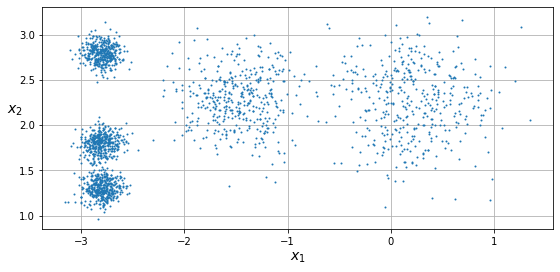

In [ ]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Each instance was assigned to one of the 5 clusters:

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to (they are not targets, they are predictions):

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

Of course, we can predict the labels of new instances:

In [ ]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

**Decision Boundaries**

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

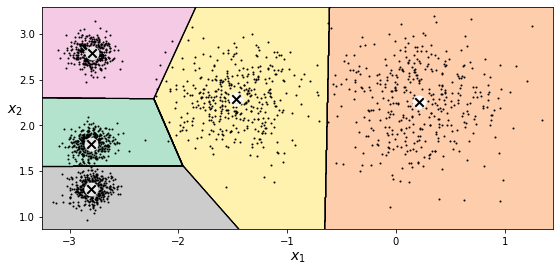

In [ ]:
# extra code – this cell generates and saves Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

**Hard Clustering _vs_ Soft Clustering**

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better to measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [ ]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [ ]:
# extra code
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

### Exercise

Try clustering the iris data.  Try different numbers of clusters. Print the confusion matrix that compares the cluster labels with the actual labels.  What seems to give the best clustering according to ground truth?  How do you know?

In [23]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
